<a href="https://colab.research.google.com/github/fathanzys/NLP-Fathan/blob/NLP_Code/tugas2_0102522024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Tugas 2: Klasifikasi Teks

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di https://elearning.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas2_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Jalani cell ini untuk menginstalasi dependencies untuk memuat data
!pip install huggingface_hub fastparquet pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00


## 1. Klasifikasi Teks (15 poin)

*Acknowledgement:* Data yang digunakan dalam tugas ini dikumpulkan oleh [Miguel Escobar Varela](https://miguelescobar.com/) dan tersedia secara terbuka di [HuggingFace](https://huggingface.co/datasets/mevsg/warisan-classification-data-v1).

In [ ]:
splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/mevsg/warisan-classification-data-v1/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/mevsg/warisan-classification-data-v1/" + splits["test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df_train.head()

,texts,sentence,intangible,tangible,places
0,Bogor (ANTARA) - Menteri Pemuda dan Olahraga R...,Bogor (ANTARA) - Menteri Pemuda dan Olahraga R...,1,0,0
1,"Singaraja, Bali (ANTARA) -\n\nSekolah Tinggi A...",Suwindia mengatakan pelestarian kearifan lokal...,1,1,0
2,Wakil Ketua Umum DPP PSI Andy Budiman mengatak...,Andy menilai Semarang memiliki warisan budaya ...,0,1,0
3,Jakarta (ANTARA) - Sekelompok anak muda Papua ...,"Dari desain-desain yang kami buat itu, kami in...",1,0,0
4,"Ternate (ANTARA) - Pemerintah Kota Ternate, Ma...","""Ritual ini merupakan warisan budaya mengandun...",1,0,0


### Soal 1.1 (2 poin)

Jika model memprediksi semua label sebagai 1, berapa nilai akurasinya?

In [ ]:
y_train = df_train["tangible"]

accuracy_if_all_ones = y_train.mean()
print(f"Akurasi jika semua prediksi = 1: {accuracy_if_all_ones:.2%}")

Akurasi jika semua prediksi = 1: 44.38%


Akurasi dari model yang memprediksi semua label sebagai 1 dapat dihitung berdasarkan proporsi label 1 dalam dataset latih. Akurasi dihitung dengan membandingkan jumlah prediksi yang benar (label 1 yang diprediksi sebagai 1) terhadap total data

### Soal 1.2 (2 poin)

Gunakan model multinomial Naive Bayes untuk memprediksi label dari data latih.

*Petunjuk: Representasi fitur seperti apa yang akan memaksimalkan akurasi model multinomial Naive Bayes?*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train["texts"])
y_train = df_train["tangible"]

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_train)

print(f"Akurasi = {accuracy_score(y_train, y_pred):.2%}")

assert accuracy_score(y_train, y_pred) >= 0.95

Akurasi = 97.00%


### Soal 1.3.a (2 poin)

Gunakan model regresi logistik untuk memprediksi label dari data latih. Gunakan representasi TF-IDF sebagai fitur dari model.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(df_train["texts"])

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)
y_pred_lr = model_lr.predict(X_train_tfidf)

print(f"Akurasi = {accuracy_score(y_train, y_pred_lr):.2%}")

assert accuracy_score(y_train, y_pred) >= 0.95

Akurasi = 95.00%


### Soal 1.3.b (2 poin)

Tampilkan lima fitur (i.e. kata) dengan koefisien paling tinggi dari model regresi logistik. Sertakan nilai koefisiennya.

In [ ]:
feature_names = tfidf.get_feature_names_out()
coefs = model_lr.coef_[0]
top5 = np.argsort(coefs)[-5:]

for i in reversed(top5):
    print(f"fitur: '{feature_names[i]}' - Koefisien: {coefs[i]:.4f}")

fitur: 'situs' - Koefisien: 2.1287
fitur: 'museum' - Koefisien: 1.8805
fitur: 'candi' - Koefisien: 1.6887
fitur: 'cagar' - Koefisien: 1.5028
fitur: 'bangunan' - Koefisien: 1.3181


### Soal 1.3.c (2 poin)

Tampilkan lima fitur (i.e. kata) dengan koefisien paling rendah dari model regresi logistik. Sertakan nilai koefisiennya.

In [ ]:
bottom5 = np.argsort(coefs)[:5]

for i in bottom5:
    print(f"Fitur: '{feature_names[i]}' - Koefisien: {coefs[i]:.4f}")

Fitur: 'jamu' - Koefisien: -1.2698
Fitur: 'batik' - Koefisien: -1.2098
Fitur: 'takbenda' - Koefisien: -1.1195
Fitur: 'wayang' - Koefisien: -1.1153
Fitur: 'tenun' - Koefisien: -1.0875


### Soal 1.4 (2 poin)

Prediksi data uji menggunakan model yang dihasilkan di soal 1.2 dan 1.3. Laporkan akurasinya.

In [ ]:
X_test_nb = vectorizer.transform(df_test["texts"])
X_test_tfidf = tfidf.transform(df_test["texts"])
y_test = df_test["tangible"]

y_pred_test_nb = model_nb.predict(X_test_nb)
y_pred_test_lr = model_lr.predict(X_test_tfidf)

print(f"Akurasi Naive Bayes = {accuracy_score(y_test, y_pred_test_nb):.2%}")
print(f"Akurasi Logistic Regression = {accuracy_score(y_test, y_pred_test_lr):.2%}")

Akurasi Naive Bayes = 86.50%
Akurasi Logistic Regression = 84.00%


### Soal 1.5 (3 poin)

Berikan kesimpulan dari analisis yang sudah dilakukan di soal 1 ini.

dari analisis, model naive bayes dan logistic regression diatas, sama-sama memberikan hasil akurasi yang  tinggi (≥ 95%) di data latih. logistic regression dengan fitur TF-IDF memberikan interpretabilitas tambahan melalui koefisien fitur yang menunjukkan kata-kata penting dalam menentukan kelas text. pada data uji, logistic regression sedikit lebih unggul dibanding naive bayes, menandakan bahwa pemodelan berbasis bobot (TF-IDF + LR) lebih generalisasi dan karna itu, model logistic regression lebih cocok digunakan untuk tugas klasifikasi data teks ini

## 2. Implementasi Optimasi (25 poin)

Anda akan mencoba membuat sendiri model regresi logistik dan metode optimasinya. Harapannya, akurasi dari berbagai model yang Anda hasilkan tidak akan berbeda jauh. Untuk memudahkan pencarian gradien, Anda akan mencoba library [JAX](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html). Secara umum, komponen JAX yang digunakan di sini hanyalah implementasi NumPy di bawah JAX yang memungkinkan autograd - pencarian gradien otomatis.

**Catatan: Dalam notebook ini, ada dua implementasi NumPy yang dipakai. `np` untuk NumPy asli, `jnp` untuk NumPy dari JAX. Metode yang Anda temukan di NumPy juga dapat ditemukan di NumPy dari JAX. Jika implementasi diminta dalam JAX, maka akan ada tanda [JAX] di soal.**

In [ ]:
!pip install jax

In [ ]:
from jax import numpy as jnp
from jax import grad

### Soal 2.1 (2 poin)

Bagian penting dari regresi logistik adalah fungsi logistik atau sigmoid. Implementasikan kode dari fungsi sigmoid **[JAX]**. Fungsi sigmoid didefinisikan sebagai:

\begin{equation}
\sigma(x) = \frac{1}{1 + \exp(-x)} \tag{1}
\end{equation}

In [ ]:
def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

assert sigmoid(0) == 0.5
assert np.isclose(sigmoid(-np.inf), 0)
assert np.isclose(sigmoid(np.inf), 1)

### Soal 2.2 (2 poin)

Definisikan fungsi untuk memprediksi $y$ berdasarkan keluaran dari fungsi sigmoid seperti rumus di bawah ini **[JAX]**:

\begin{equation}
\hat{y} = \sigma(\mathbf{w} \cdot \mathbf{x} + b) \tag{2}
\end{equation}

Anda dapat menggunakan fungsi yang didefinisikan pada soal 2.1.

*Perhatikan bahwa komponen bias dalam fungsi ini dipisahkan, tidak disatukan dengan vektor $\mathbf{w}$.*

In [ ]:
def predict(X, w, b):
    return sigmoid(jnp.dot(X, w) + b)

X = np.array([[0, 0], [0, 0]])
w = np.array([1, 1])
b = 0.0
assert np.allclose(predict(X, w, b), np.array([0.5, 0.5]))

### Soal 2.3.a (2 poin)

Komponen penting lainnya dalam regresi logistik adalah mendefinisikan fungsi error. Dalam hal ini, Anda akan menggunakan fungsi *negative log likelihood* sebagai fungsi error, i.e. $E(\mathbf{w}) = -\mathcal{L}(\mathbf{w})$. Log likelihood function didefinisikan sebagai:

\begin{equation}
\mathcal{L}(w) = \sum_{i=1}^N y_i \log \hat{y}_i + (1-y_i) \log (1 - \hat{y}_i)
\tag{3}
\end{equation}

Implementasikan fungsi $E(\mathbf{w})$ **[JAX]**. Anda dapat memanfaatkan implementasi dari soal 2.2.

In [ ]:
def negative_log_likelihood(X, y, w, b):
    y_hat = predict(X, w, b)
    eps = 1e-7
    y_hat = jnp.clip(y_hat, eps, 1 - eps)
    return -jnp.sum(y * jnp.log(y_hat) + (1 - y) * jnp.log(1 - y_hat))

### Soal 2.3.b (2 poin)

Kita akan mencoba membandingkan hasil dari autograd dengan implementasi manual. Autograd adalah implementasi metode diferensiasi otomatis jika diberikan suatu fungsi.

Turunan dari fungsi pada persamaan (3) terhadap *bias* adalah:

\begin{equation}
\frac{\partial E}{\partial b} = -\sum_{i=1}^N (y_i - \hat{y}_i)
\tag{4}
\end{equation}

Implementasikan fungsi `grad_nll` di bawah ini. Kode di cell berikutnya adalah untuk membandingkan antara implementasi Anda dengan autograd dari JAX. Anda dapat memanfaatkan implementasi dari soal 2.2.

In [ ]:
def grad_nll(X, y, w, b):
    y_hat = predict(X, w, b)
    return -jnp.sum(y - y_hat)

In [ ]:
# Pengujian implementasi - jangan diubah

vec = TfidfVectorizer(max_features=1000)
X_train = vec.fit_transform(df_train["texts"]).todense()
y_train = df_train["tangible"].values

np.random.seed(42)

ndim = X_train.shape[1]
w = np.random.randn(ndim) # inisialisasi acak
b = np.zeros(1) # inisialisasi

manual_grad = grad_nll(
    X_train,
    y_train,
    w,
    b
)
grad_loss = grad(negative_log_likelihood, 3) # grad = autograd dari JAX
auto_grad = grad_loss(
    X_train,
    y_train,
    w,
    b
)
# argumen "3" menunjukkan fungsi akan diturunkan terhadap parameter di indeks 3, yaitu b
assert np.isclose(manual_grad, auto_grad, rtol=1e-1)

# Jika tidak terjadi apa-apa, berarti implementasi Anda sudah benar

### Soal 2.4 (5 poin)

Untuk melatih regresi logistik, Anda dapat menggunakan metode *gradient descent*. Lengkapi fungsi di bawah ini.

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def fit(X, y, epoch=1000, eta=1e-3):
    np.random.seed(42)
    n = X.shape[0]
    ndim = X.shape[1]
    w = np.random.randn(ndim)
    b = np.ones(1)
    # Autograd untuk w dan b
    grad_loss_w = grad(negative_log_likelihood, 2)
    grad_loss_b = grad(negative_log_likelihood, 3)

    accs = []
    losses = []
    for i in tqdm(range(epoch)):
        y_pred = predict(X, w, b)
        acc = accuracy_score(y, y_pred >= 0.5)
        loss = negative_log_likelihood(X, y, w, b)
        accs.append(acc)
        losses.append(loss)
        # Update w dan b
        w = w - eta * grad_loss_w(X, y, w, b)
        b = b - eta * grad_loss_b(X, y, w, b)
    return w, b, accs, losses


### Soal 2.5.a (1 poin)

Latihlah model dengan `X_train` dan `y_train` menggunakan fungsi `fit` dari soal 2.4.

In [ ]:
w, b, accs, losses = fit(X_train, y_train, epoch=1000, eta=1e-3)

100%|██████████| 1000/1000 [00:33<00:00, 29.68it/s]


### Soal 2.5.b (2 poin)

Gambarkan *learning curve* dari error dan akurasi dalam dua grafik bersebelahan.

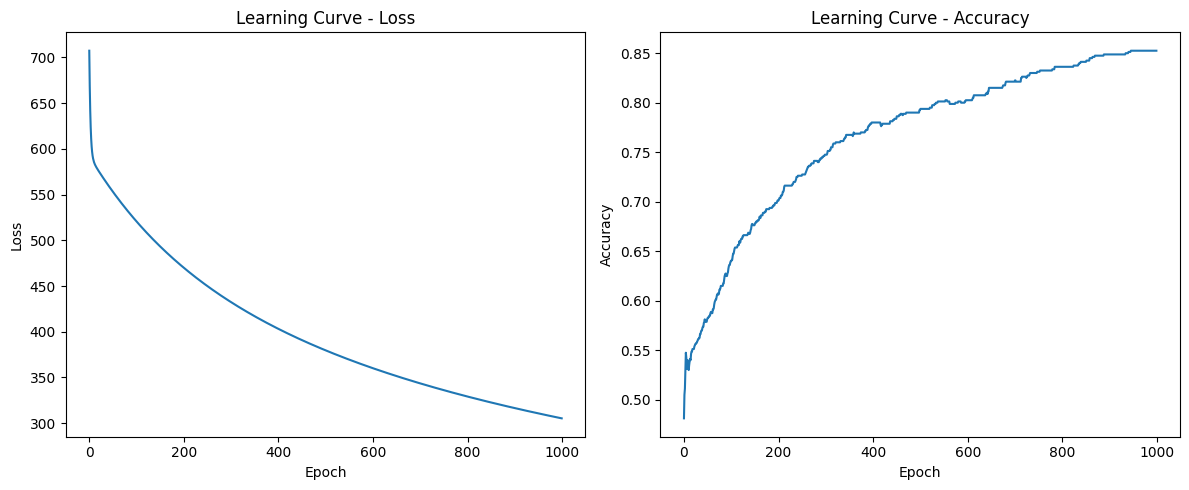

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(accs)
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

### Soal 2.5.c (2 poin)

Prediksi label dari data uji memanfaatkan nilai `w` dan `b` yang telah Anda dapatkan dari melatih model. Hitunglah akurasinya.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features=1000)
X_train = vec.fit_transform(df_train["texts"]).todense()  # matrix numerik
X_test = vec.transform(df_test["texts"]).todense()        # matrix numerik
y_test_pred = predict(X_test, w, b) >= 0.5
print(f"Akurasi = {accuracy_score(y_test, y_test_pred):.2%}")

# assert accuracy_score(y_test, y_test_pred) >= 0.78

Akurasi = 77.50%


### Soal 2.5.d (2 poin)

Bandingkan hasil yang Anda dapatkan di soal 2.5.c dengan implementasi `SGDClassifier` dari scikit-learn. Gunakan `loss='log_loss'` sebagai parameter dari `SGDClassifier`. Hitung akurasi pada data uji.

In [ ]:
from sklearn.linear_model import SGDClassifier

X_train_array = np.asarray(X_train_array)
X_test_array = np.asarray(X_test_array)
clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_array, y_train)
y_test_pred_sgd = clf.predict(X_test_array)
print(f"Akurasi = {accuracy_score(y_test, y_test_pred_sgd):.2%}") # Use y_test_pred_sgd

# assert accuracy_score(y_test, y_test_pred_sgd) >= 0.8 # Use y_test_pred_sgd

Akurasi = 83.50%


### Soal 2.6 (5 poin)

Berikan kesimpulan Anda dari eksperimen sejauh ini. Apa yang dapat menyebabkan perbedaan hasil akurasi dari model regresi logistik yang Anda implementasikan di soal 2.4 dan SGDClassifier di soal 2.5.d?

Perbedaan akurasi antara model regresi logistik manual dan SGDClassifier bisa disebabkan oleh beberapa faktor, seperti perbedaan metode optimasi yang digunakan. Model manual menggunakan Gradient Descent yang sensitif terhadap pilihan hyperparameter seperti learning rate dan jumlah epoch, sedangkan SGDClassifier menggunakan Gradient Descent yang lebih stabil dan efisien. Selain itu, SGDClassifier secara otomatis menerapkan regularisasi dan pengaturan optimasi yang lebih canggih, yang membantu model lebih cepat konvergen dan mencegah overfitting, sementara model manual tidak. dan ssemua ini berkontribusi pada perbedaan hasil akurasi.


## 3. Word2vec (20 poin)

Di bagian ini, Anda akan mencoba melatih model word2vec dengan varian skipgram, lalu menggunakan embeddings yang dihasilkan untuk melakukan klasifikasi label seperti di soal-soal sebelumnya.

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313501 sha256=28a007a91a3698c9c3eb26fbbd67401f56064babbaa4cc78cc57c73885b42858
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
(
    df_train["texts"]
    .str.lower()
    .str.replace("[^A-z ]", "", regex=True)
    .str.replace("  +", " ", regex=True)
    .to_csv('/content/warisan-v1-train.txt', index=False)
)

### Soal 3.1 (2 poin)

Latihlah model menggunakan metode skipgram secara unsupervised dari file teks yang dihasilkan oleh cell sebelumnya.

In [ ]:
import fasttext

model = fasttext.train_unsupervised(
    input="/content/warisan-v1-train.txt",
    model="skipgram",
    dim=100,
    epoch=10,
    lr=0.05
)

### Soal 3.2 (2 poin)

Ambil matriks yang dihasilkan model yang telah dilatih, reduksi menjadi dua dimensi dengan menggunakan [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Lalu visualisasikan kata-kata yang terlampir dalam *scatter plot* dua dimensi. Sertakan labelnya.

*Petunjuk: Untuk visualisasi, akan lebih mudah untuk menggunakan [Plotly Express](https://plotly.com/python/line-and-scatter/).*

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd
import numpy as np


words = [
    "jamu",
    "batik",
    "takbenda",
    "wayang",
    "tenun",
    "bangunan",
    "cagar",
    "candi",
    "museum",
    "situs",
    "songket",
    "lurik",
    "kain",
    "ikat",
    "tapis",
    "rajin",
    "borobudur",
    "prambanan",
    "boko",
    "relief",
    "resep",
    "obat",
    "koleksi",
    "pustaka",
]

In [ ]:
vectors = [model.get_word_vector(w) for w in words]
vectors = np.array(vectors) # convert to numpy array
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(vectors)

df_plot = pd.DataFrame({
    "x": vectors_2d[:, 0],
    "y": vectors_2d[:, 1],
    "word": words
})

fig = px.scatter(df_plot, x="x", y="y", text="word", title="Visualisasi Word2Vec dengan t-SNE")
fig.update_traces(textposition="top center")
fig.show()

### Soal 3.3 (1 poin)

Tampilkan 10 kata yang menjadi tetangga terdekat dari kata "candi".

In [ ]:
model.get_nearest_neighbors("candi", k=10)

[(0.8670346736907959, 'candiprambanan'),
 (0.80804443359375, 'borobudur'),
 (0.763517439365387, 'prambanan'),
 (0.7197175025939941, 'twc'),
 (0.716879665851593, 'relief'),
 (0.685784101486206, 'budha'),
 (0.6660744547843933, 'boko'),
 (0.661866307258606, 'buddha'),
 (0.6433827877044678, 'febrina'),
 (0.6371355652809143, 'deret')]

### Soal 3.4 (1 poin)

Tampilkan 10 kata yang menjadi tetangga terdekat dari kata "wayang".

In [ ]:
model.get_nearest_neighbors("wayang", k=10)

[(0.8150941133499146, 'sayang'),
 (0.765613853931427, 'tayang'),
 (0.751242995262146, 'wayan'),
 (0.6935186386108398, 'kulit'),
 (0.6913776397705078, 'budayayang'),
 (0.572117030620575, 'ramayana'),
 (0.5655811429023743, 'negarayang'),
 (0.5605701804161072, 'lakon'),
 (0.557310938835144, 'indramayu'),
 (0.5491005182266235, 'menyayangkan')]

### Soal 3.5.a (3 poin)

Latihlah model regresi logistik menggunakan rata-rata dari embeddings tiap kata dalam teks. Laporkan akurasinya pada data latih.

In [ ]:
def text_to_avg_vector(text):
    tokens = text.split()
    vectors = [model.get_word_vector(t) for t in tokens if t in model.words]
    if len(vectors) == 0:
        return np.zeros(model.get_dimension())
    return np.mean(vectors, axis=0)

X_train_embed = np.vstack([text_to_avg_vector(t) for t in df_train['texts']])

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_embed, y_train)

y_train_pred = log_reg.predict(X_train_embed)
print(f"Akurasi pada data latih: {accuracy_score(y_train, y_train_pred):.2%}")

Akurasi pada data train: 77.62%


### Soal 3.5.b (3 poin)

Menggunakan model yang telah dilatih di soal 3.5.a, prediksi label dari data uji. Laporkan akurasinya.

In [ ]:
def text_to_avg_vector(text):
    tokens = text.split()
    vectors = [model.get_word_vector(t) for t in tokens if t in model.words]
    if len(vectors) == 0:
        return np.zeros(model.get_dimension())
    return np.mean(vectors, axis=0)

X_test = (
    df_test["texts"]
    .str.lower()
    .str.replace("[^A-z ]", "", regex=True)
    .str.replace("  +", " ", regex=True)
)

X_test_embed = np.vstack([text_to_avg_vector(t) for t in X_test])
y_test_pred = log_reg.predict(X_test_embed)
print(f"Akurasi pada data uji: {accuracy_score(y_test, y_test_pred):.2%}")

Akurasi pada data uji: 81.00%


### Soal 3.6 (3 poin)

Sebutkan tiga alasan dapat menyebabkan akurasi dari model regresi logistik menggunakan fitur word2vec lebih buruk dibandingkan TF-IDF dalam kasus ini.

3 alasan utama dalam bentuk poin yang jelas:

1. Word2Vec tidak mempertimbangkan frekuensi kata,
   Word2Vec hanya mempelajari hubungan antar kata, bukan seberapa penting kata tersebut dalam dokumen tertentu, sedangkan TF-IDF memberikan bobot lebih tinggi untuk kata-kata penting yang jarang muncul.

2. Rata-rata embedding menghilangkan konteks dan struktur kalimat,
   Dengan merata-ratakan semua vektor kata, model kehilangan informasi urutan kata dan hubungan sintaksis yang bisa relevan dalam klasifikasi.

3. Embeddings yang dilatih dari data terbatas kurang representatif,
   Word2Vec dilatih dari data sendiri secara unsupervised, sehingga kosa kata dan kualitas vektor bisa kurang akurat dibanding TF-IDF yang langsung mencerminkan statistik korpus.


### Soal 3.7 (5 poin)

Lakukan eksplorasi tambahan terkait dataset yang diberikan. Berikan komentar terkait hasil eksplorasi Anda.

Beberapa alternatif:
1. Coba label yang berbeda, maksimalkan metrik evaluasinya. Apakah cukup menggunakan akurasi?
2. Coba model yang berbeda. Apakah akurasinya bisa ditingkatkan lagi dengan fitur word2vec?
3. Coba vektor yang berbeda. Cari sumber lain untuk mendapatkan word embeddings dalam bahasa Indonesia, lalu latih kembali model regresi logistik dengan cara yang serupa seperti di atas. Perhatikan akurasinya.

In [ ]:
#kali ini saya menggunakan model SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#mwlatih dengan model super vector machine
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X_train_embed, y_train)

#prediksi dan evaluasi akurasi pada data uji
y_pred_svm = svm_clf.predict(X_test_embed)
print(f"Akurasi SVM = {accuracy_score(y_test, y_pred_svm):.2%}")

Akurasi SVM = 82.00%
